Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[-0.6814353   0.34506717  2.1213112 ]
 [ 8.356191   -3.9426208  -0.06860597]
 [-0.4145041  -1.9783586  -1.4145199 ]
 [-2.6523242  -0.9710743  -1.514259  ]
 [-2.883951   -1.2964846  -1.1295379 ]
 [-2.34199     0.07185745 -1.3357955 ]
 [ 4.1412735   6.194173   -2.2598586 ]
 [ 0.04066128  0.9139161   3.57817   ]
 [-2.7625933  -0.5388673  -0.9507155 ]
 [-0.80133003  1.2023928   2.9738111 ]]


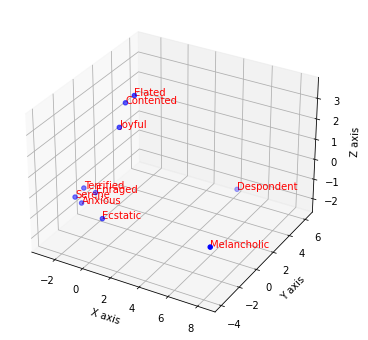

In [2]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA

# Load pre-trained model tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Words to be embedded
words = ["Joyful","Melancholic","Ecstatic","Anxious","Serene","Enraged","Despondent","Elated","Terrified","Contented"]

# Tokenize the input words and convert to tensor
tokens = tokenizer(words, padding=True, return_tensors='pt')
outputs = model(**tokens)

# Use the mean of the token embeddings for each word (excluding special tokens)
embeddings = outputs.last_hidden_state[:, 1:-1, :].mean(dim=1).detach().numpy()

# Reduce the dimensionality of the embeddings to 3 dimensions using PCA
pca = PCA(n_components=3)
words_embedding_3d = pca.fit_transform(embeddings)

print(words_embedding_3d)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming 'points' is your list of points with x, y, z coordinates
points = np.array(words_embedding_3d)  # Replace with your actual list of points

# Extracting x, y, z coordinates
x_coords = points[:, 0]
y_coords = points[:, 1]
z_coords = points[:, 2]

# Creating a new figure and a 3D subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the scatter plot
ax.scatter(x_coords, y_coords, z_coords,color = 'blue')

for i, (x, y, z) in enumerate(zip(x_coords, y_coords, z_coords)):
    ax.text(x, y, z, words[i], size=10, zorder=1, color='red')


# Setting labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Showing the plot
plt.savefig('semtim_word.png',transparent = True)
plt.show()
